# Part 1: PCA From Stratch

Given the following matrix of 6 points in 7 dimensions will project these 6 points onto two principal components (2-dimensions).

$$\begin{bmatrix} 13.77 & 1.9 & 2.68 & 17.1 &115 &3.0 &12.79 \\
13.74 & 1.67 & 2.25 & 16.4 & 118 & 2.6 & 15.9 \\
13.56 &	1.73 & 2.46 & 20.5 & 116 & 2.96 & 10.78\\
14.22 &	1.70 & 2.30	& 16.3 & 118 & 3.2 & 9.03\\
13.29 &	1.97 & 2.68	& 16.8 & 113 & 3.9 & 12.23 \\
13.72 &	1.43 & 2.50	& 16.7 & 117 & 3.4 & 13.80 \end{bmatrix}$$

**Steps:**

Step 1: normalization
- Subtract the column mean of the points from each point.
- Divide each point by the column standard deviation of the points. 

Step 2: Compute the covariance matrix
- Find the covariance matrix of the resulting data.
 
Step 3: Find the eigenvectors and eigenvalues of the covariance matrix.
- Sort the eigenvalues in **ascending** order based on their **magnitudes**.
- Sort both eigenvectors in **ascending** order based on the **magnitude** of their corresponding **eigenvalues**.
- Reorganize the eigenvectors row-wise. This means each row is an eigenvector. 

Step 4: projection
- Pick the two eigenvectors with the largest magnitude of eigenvalues.
- Project the normalized data onto the two selected eigenvectors. (Matrix multiplication)

In [1]:
import numpy as np

In [2]:
A = np.array([
    [13.77 , 1.9 , 2.68 , 17.1 ,115 ,3.0 ,12.79 ],
    [13.74 , 1.67 , 2.25 , 16.4 , 118 , 2.6 , 15.9 ],
    [13.56 ,1.73 , 2.46 , 20.5 , 116 , 2.96 , 10.78],
    [14.22 ,1.70 , 2.30	, 16.3 , 118 , 3.2 , 9.03],
    [13.29 ,1.97 , 2.68	, 16.8 , 113 , 3.9 , 12.23 ],
    [13.72 ,1.43 , 2.50	, 16.7 , 117 , 3.4 , 13.80 ]
])

1. Print the data after subtracting the mean and dividing by standard deviation.

In [3]:
# normalizing the data (X - mean)/population std (n)
column_means = np.mean(A, axis = 0)
column_std = np.std(A, axis = 0, ddof = 0) # use population std
normalized_A = (A - column_means) / column_std

print("Data after normalization:\n", normalized_A)

Data after normalization:
 [[ 0.19192325  0.95976539  1.21212307 -0.13746868 -0.65850461 -0.43617337
   0.16939124]
 [ 0.08396642 -0.36471085 -1.37240381 -0.61860906  1.03479296 -1.42373571
   1.59963578]
 [-0.56377454 -0.01919531 -0.11019301  2.19949887 -0.09407209 -0.5349296
  -0.75497904]
 [ 1.81127563 -0.19195308 -1.07187743 -0.6873434   1.03479296  0.0576078
  -1.55977902]
 [-1.53538597  1.36286685  1.21212307 -0.3436717  -1.78736965  1.7858419
  -0.08814476]
 [ 0.0119952  -1.746773    0.1302281  -0.41240604  0.47036043  0.55138897
   0.6338758 ]]


2. Print the covariance matrix.

In [4]:
covariance_matrix = np.cov(normalized_A, rowvar = False, bias = True) # use population covariance
print("Covariance matrix:\n", covariance_matrix)

Covariance matrix:
 [[ 1.         -0.3827933  -0.60357622 -0.34009897  0.77296343 -0.42211285
  -0.34829771]
 [-0.3827933   1.          0.54937219  0.07256572 -0.74396597  0.26175854
  -0.22238316]
 [-0.60357622  0.54937219  1.          0.11774195 -0.90373423  0.609818
  -0.04320529]
 [-0.34009897  0.07256572  0.11774195  1.         -0.17458153 -0.18610281
  -0.30540471]
 [ 0.77296343 -0.74396597 -0.90373423 -0.17458153  1.         -0.66812058
   0.07606973]
 [-0.42211285  0.26175854  0.609818   -0.18610281 -0.66812058  1.
  -0.30753964]
 [-0.34829771 -0.22238316 -0.04320529 -0.30540471  0.07606973 -0.30753964
   1.        ]]


3. Compute eigenvalues and eigenvectors.

- 3.1. Print all eigenvalues. 

In [5]:
eig_vals, eig_vectors = np.linalg.eigh(covariance_matrix) # for symmetric covariance matrix
sorting = np.argsort(np.abs(eig_vals))
eig_vals_sorted = eig_vals[sorting] 

print("Sorted Eigenvalues Based on Magnitude:\n", eig_vals_sorted)

Sorted Eigenvalues Based on Magnitude:
 [ 1.14726547e-16 -3.92282303e-16  2.83249503e-01  7.12872434e-01
  1.19424660e+00  1.34603391e+00  3.46359756e+00]


- 3.2. Print all eigenvectors.

In [6]:
eig_vectors_sorted = eig_vectors[:, sorting]
eig_vectors_sorted_as_rows = eig_vectors_sorted.T 

print("Eigenvectors sorted in ascending order based on magnitude as rows: ")
print(eig_vectors_sorted_as_rows)

Eigenvectors sorted in ascending order based on magnitude as rows: 
[[-0.33989529  0.25157087  0.34587601 -0.04134309  0.82585305  0.09500411
  -0.09372722]
 [ 0.47806255  0.27815315 -0.05475035  0.41940768  0.15503468  0.49621111
   0.49489938]
 [-0.43889955  0.27594636 -0.79700184 -0.05509595  0.02390879  0.29448645
  -0.07536182]
 [-0.21835181 -0.78172592  0.03969055  0.21978446  0.07234695  0.52827093
  -0.08391819]
 [ 0.33084812  0.01692511  0.06521047 -0.80502135 -0.0040902   0.47428393
  -0.11392672]
 [ 0.3634212   0.15766721 -0.04703981  0.33328611  0.02919739  0.10990418
  -0.84666539]
 [-0.4172309   0.38334801  0.48385925  0.1091245  -0.53596274  0.37673881
  -0.06120912]]


4. Print the projection of the data onto the two eigenvectors with the largest magnitude of eigenvalues. 

In [7]:
top_eig_vectors = eig_vectors_sorted[:, -2:]
projection = normalized_A @ top_eig_vectors

print(projection)

[[-0.09234351  1.03758582]
 [-1.64922147 -2.09529952]
 [ 1.10800876  0.30966898]
 [ 1.80648567 -1.86038347]
 [-0.29595736  3.34821148]
 [-0.87697209 -0.73978329]]


**CODE EXPLANATION** Finally, we have performed PCA hwere we have take our normalized_A matrix that has each row be a data point and each column is a normalized feature and then our top_eig_vectors which serves to take the two eigenvectors with two largest eigenvalues from the covariance matrix. This is because they represent the direction with the maximum amount of variance represented in the data; so, the projection then creates a new matrix whose axes are the principal components, enabling a much more compressed/lower-dimensional representation of the data.

# PART 2: Scikit-Learn PCA

In [8]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

data = pd.read_csv('PA2_data.csv')
data.head()

,ID,number of subjects learned,How comfortable are you with programming?,How comfortable are you with statistics?,programming lanuages,total_points,Final Project,hw time sum
0,002_wi20,4,6,5,1,97.95,21.75,14.0
1,005_wi20,1,6,6,0,101.15,23.50,35.0
2,007_wi20,5,10,8,1,97.48,24.50,6.5
3,011_wi20,2,7,3,0,95.72,22.00,37.0
4,014_wi20,2,4,7,0,98.70,23.25,48.0


In [9]:
X = data.to_numpy()

X = X[:,1:].astype(float)
X = X/X.max(axis=0)           # scaling the values to [0,1] range. We can divide by the max value of each column because we do not have negative values in the data.
print('Shape of X: ', X.shape)

Shape of X:  (181, 7)


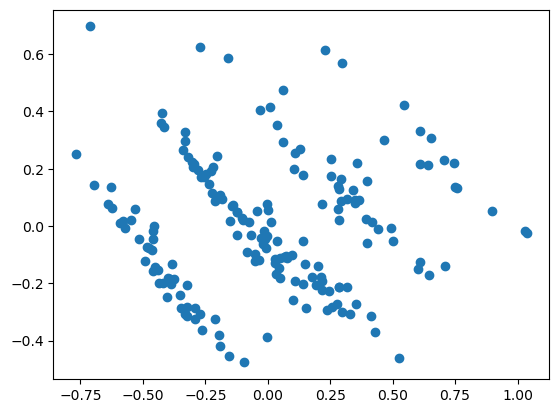

In [10]:
pca = PCA(n_components = 2)
X_pca = pca.fit_transform(X) 
plt.scatter(X_pca[:,0], X_pca[:, 1]) 

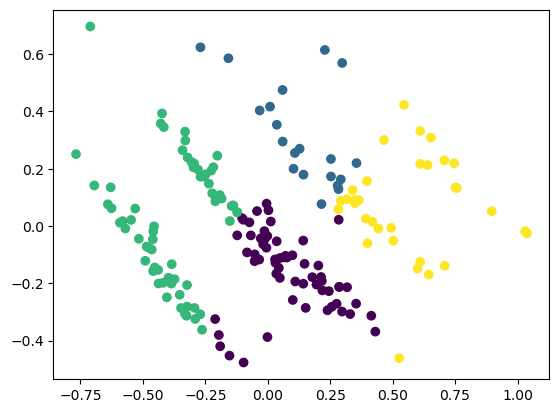

In [11]:
from sklearn.cluster import KMeans

labels = KMeans(n_clusters = 4).fit_predict(X_pca)
plt.scatter(X_pca[:,0], X_pca[:, 1], c = labels)

**CODE EXPLANATION:** The code here focuses on creating a KMeans clustering model that will be divided into 4 clusters (k = 4) and then uses the fit_predict() function in order to fit the KMeans model to the dataset of X_pca, which is the data we have after using PCA to reduce the dimensions of the data. Then, this model assigns each data point to the cluster that it is closest to and then leads to labels that is an array of cluster labels {from values 0, 1, 2, 3} because we have 4 clusters. Finally, we plot the first two PCA components on the x and y axis and use the labels created from the fit_predict(X_pca) in order to color what points belong to which cluster.